# Introduction to Quantum Computing

These notes introduce the theoretical foundations of quantum computing, including: 
- Quantum states and qubits
- Measurement of a quantum state
- Quantum gates
  
We will also implement examples using Python and Qiskit.

## Quantum states and qubits

The fundamental unit in quantum information theory is an $m$-dimensional quantum state, which is called $\textit{quantum digit}$ (or $\textit{qudit}$). If $m=2$, then the $2$-dimensional quantum state is called $\textit{quantum bit}$ (or commonly saying $\textit{qubit}$). A qubit is represented by "ket", $\ket{.}$, and it can be expressed as 

$$
    \ket{\psi} = a\ket{0} + b\ket{1} = a \begin{pmatrix} 1 \\ 0 \end{pmatrix} + b \begin{pmatrix} 0 \\ 1 \end{pmatrix} 
$$

where $a,b \in \mathbb{C}$ and $|a|^2 + |b|^2 = 1$. The state $\ket{\psi}$ is called $\textit{superposition}$ of $\ket{0}$ and $\ket{1}$. 

Note that a superposition is $\textit{normalized}$, which means the squared sum of coefficients is equal to $1$. In other words, the length of a superposition $\ket{\psi}$ is $1$. 

For example, $\ket{+} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$ is a quantum state, which is a normalized $2$-dimensional vector: $\ket{+} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix}$ and $|\frac{1}{\sqrt{2}}|^{2} + |\frac{1}{\sqrt{2}}|^{2} = 1$.

Another example of a quantum state is $\ket{-} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})$. It is normalized and expressed as follows: $\ket{-} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix}$ and $|\frac{1}{\sqrt{2}}|^{2} + |\frac{-1}{\sqrt{2}}|^{2} = 1$.

### Normalization of Qubit States

Suppose we are given a state that is **not** normalized:

$$ \ket{\psi} = a\ket{0} + b\ket{1}, \quad \text{with } |a|^2 + |b|^2 \ne 1 $$

To normalize it, we define:

$$ \alpha = \frac{a}{\sqrt{|a|^2 + |b|^2}}, \quad \beta = \frac{b}{\sqrt{|a|^2 + |b|^2}} $$

Then, the normalized state is:

$$ \ket{\psi'} = \alpha\ket{0} + \beta\ket{1}, \quad \text{where } |\alpha|^2 + |\beta|^2 = 1 $$

#### Code example: normalization of a state

Given the initial qubits $\ket{0}$ and $\ket{1}$, we construct a function *normalization_state* with two parameters, $\alpha$ and $\beta$, that are amplitudes of the initial state. The aim of our code is to implement the normalization of a given state. 

In [35]:
import numpy as np

# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])


def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex):  The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """
    # define the state vector
    state_vector = alpha * ket_0 + beta * ket_1
    
    # compute normalization factor and obtain the normalized vector such that |a'|^2 + |b'|^2 = 1
    normalization_factor = np.linalg.norm(state_vector)
    
    if normalization_factor == 0:
        raise ValueError("Cannot normalize the zero vector.")
    else:
        normalized_vector = state_vector/normalization_factor
    
    # return the normalized state
    return normalized_vector


In [41]:
normalize_state(0.5, 0.5)

array([0.70710678, 0.70710678])

Note that $\ket{\psi} = \frac{1}{2}\ket{0} + \frac{1}{2}\ket{1}$ is not normalized. After a normalization process, our quantum state is $\ket{\psi^{'}} = \frac{1}{\sqrt{2}}\ket{0} + \frac{1}{\sqrt{2}}\ket{1}$

### Bra and inner product

The conjugate transpose of a ket is called "bra" and is denoted as $\bra{.}$. The bra of the state $\ket{\psi}$ is expressed as 

$$\bra{\psi}:= \ket{\psi}^{\dagger} = a^{*}\bra{0} + b^{*}\bra{1} = a^{*}\begin{pmatrix} 1 & 0 \end{pmatrix} + b^{*}\begin{pmatrix} 0 & 1 \end{pmatrix}$$ Note that the symbol of "dagger", $\dagger$,  represents *conjugate transpose*, or it said to be *Hermitian transpose*. 

Remind that the inner product between two vectors, say $u, v \in \mathbb{R}^{n}$, is stated as $\braket{u,v} = u^{T}v$. Regarding the quantum states and their vector representations, the inner product between two states, $\ket{\psi}, \ket{\phi} \in \mathbb{C}^{n}$, can be denoted as  $\braket{\phi | \psi}$. It is expressed as $\braket{\phi|\psi} = \ket{\phi}^{\dagger}\ket{\psi}$. The inner products between $\ket{0}$ and $\ket{1}$ are stated as follows:  

$$ \braket{0 | 0} = \begin{pmatrix} 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = 1 \cdot 1 + 0 \cdot 0 = 1$$
$$ \braket{0 | 1} = \begin{pmatrix} 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = 1 \cdot 0 + 0 \cdot 1 = 0$$
$$ \braket{1 | 0} = \begin{pmatrix} 0 & 1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = 0 \cdot 1 + 1 \cdot 0 = 0$$
$$ \braket{1 | 1} = \begin{pmatrix} 0 & 1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = 0 \cdot 0 + 1 \cdot 1 = 1$$


If the inner product of two vectors is equal to $0$, then the two vectors are called $\textit{orthogonal}$. A set of linearly independent vectors that spans of a vector space is called $\textit{basis}$. Note that the set $\{\ket{0}, \ket{1}\}$ forms a basis because $\ket{0}$ and $\ket{1}$ spans the $2$-dimensional state space and the two qubits are linearly independent. This basis is called $\textit{computational basis}$. If a basis consists of two normalized orthogonal vectors, it is called an $\textit{orthonormal basis}$.

#### Code example: inner product of two states

We implement a function *inner_product* taking two parameters which are quantum states. Through the function, we aim to return the inner products of given initial states. 

In [47]:
def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """
    
    # compute and return the inner product
    return np.conj(state_1[0])*state_2[0] + np.conj(state_1[1])*state_2[1]


ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

# print our results with the function we have written
print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


## Measurement of a quantum state 

In order to perform a meaningful quantum computation, we will need a way to get information from a quantum state. This can be achieved by $\textit{measurement}$. It is a probabilistic method that gives information about the probability of observing a qubit $\ket{0}$ and $\ket{1}$. After measurement of state, we can observe that the state collapses to $\ket{0}$ or $\ket{1}$ (in the computational basis) with some probabilities. 

A set of measurement operators $\{M_{m}\}_{m}$ satisfying $\sum_{m} M_{m}^{\dagger}M_{m} = I$ describe a *quantum measurement*, where $m$ denotes possible outcomes. The probability of getting outcome $m$ after the measurement of the state $\ket{\psi}$ is described as 
$$ p(m) = \bra{\psi}M_{m}^{\dagger}M_{m}\ket{\psi}$$

After getting the outcome $m$, the state $\ket{\psi}$ collapses into a state $\ket{\psi_{m}}$, which can be defined as 

$$ \ket{\psi_{m}} = \frac{M_{m} \ket{\psi}}{\sqrt{\bra{\psi}M_{m}^{\dagger}M_{m}\ket{\psi}}} = \frac{M_{m} \ket{\psi}}{\sqrt{p(m)}}$$

**Example:** Given a quantum state $\psi = \frac{1}{2} \ket{0} - \frac{\sqrt{3}i}{2} \ket{1}$, let's compute the probability of getting outcomes $\ket{0}$ and $\ket{1}$ after measurement. It can be easily seen that the state is normalized. Here we consider the measurement operators a **projective measurement** (we will introduce this concept in the next lectures) in the computational basis:

$$ M_0 = \ket{0}\bra{0}, \quad M_1 = \ket{1}\bra{1} $$


The probability of getting $0$ is that 

\begin{align*}
    p(0) &= \bra{\psi}M_{0}^{\dagger}M_{0}\ket{\psi} \\
         &= \bra{\psi}\ket{0}\bra{0}\ket{0}\bra{0}\ket{\psi}\\
         &= \bra{\psi}\ket{0}1\bra{0}\ket{\psi}\\
         &= \bra{\psi}\ket{0}\bra{0}\ket{\psi}\\
         &= \begin{pmatrix} \frac{1}{2} & \frac{\sqrt{3}}{2}i \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & 0\end{pmatrix} \begin{pmatrix} \frac{1}{2} \\ -\frac{\sqrt{3}}{2}i \end{pmatrix} \\
         &= \frac{1}{4}
\end{align*}

The probability of getting the outcome of $1$ is: 

\begin{align*}
    p(1) &= \bra{\psi}M_{1}^{\dagger}M_{1}\ket{\psi} \\
         &= \bra{\psi}\ket{1}\bra{1}\ket{1}\bra{1}\ket{\psi}\\
         &= \bra{\psi}\ket{1}1\bra{1}\ket{\psi}\\
         &= \bra{\psi}\ket{1}\bra{1}\ket{\psi}\\
         &= \begin{pmatrix} \frac{1}{2} & \frac{\sqrt{3}}{2}i \end{pmatrix} \begin{pmatrix} 0 & 0 \\ 0 & 1\end{pmatrix} \begin{pmatrix} \frac{1}{2} \\ -\frac{\sqrt{3}}{2}i \end{pmatrix} \\
         &= \frac{3}{4}
\end{align*}

After getting the outcome of $0$, the state collapses to

$$\ket{\psi_{0}} = \frac{M_{0} \ket{\psi}}{\sqrt{p(0)}} = \frac{ \begin{pmatrix} 1 & 0 \\ 0 & 0\end{pmatrix}  \begin{pmatrix} \frac{1}{2} \\ -\frac{\sqrt{3}}{2}i \end{pmatrix} }{\frac{1}{2}} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \ket{0}$$

After measurement of the state, we will obtain the outcome of $1$ with the probability $\frac{3}{4}$. The state collapses to

$$\ket{\psi_{1}} = \frac{M_{1} \ket{\psi}}{\sqrt{p(1)}} = \frac{ \begin{pmatrix} 0 & 0 \\ 0 & 1\end{pmatrix}  \begin{pmatrix} \frac{1}{2} \\ -\frac{\sqrt{3}}{2}i \end{pmatrix} }{\frac{\sqrt{3}}{2}} = -i \begin{pmatrix} 0 \\ 1 \end{pmatrix} = -i \ket{1}$$

Note: The global phase factor $(-i)$ has no observable effect and can often be ignored in quantum mechanics.

#### Code example: Measuerement of a quantum state 

We code a function *measure_state* with the parameter of a quantum state and the number of measurements. We aim to simulate the outcomes of an arbitrary number of quantum measurements. More precisely, we desire to return a list of samples $0$ and $1$ based on the probabilities given by the input state. 

For example, given $state = np.array([0.8, 0.6])$, after the measurement, we observe $\ket{0}$ with the probability of **64%**, $\ket{1}$ with the probability of **36%**. Thus, if we measure the state $10$ times, the result list might be $$[0, 1, 0, 1, 0, 1, 1, 0 ,0 ,0]$$

In [109]:
def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (np.array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        np.array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    # compute the measurement outcome probabilities
    measure_q1 = abs(state[0])**2
    measure_q2 = abs(state[1])**2
    
    # return a list of sample masurement outcomes
    return np.random.choice([0,1], num_meas, p=[measure_q1, measure_q2])


In [119]:
measure_state([0.8,0.6], 10)

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

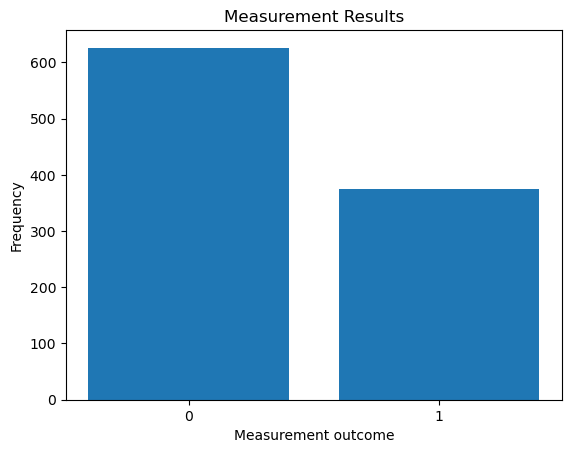

In [122]:
# viusalize the measurement outcomes 

import matplotlib.pyplot as plt
from collections import Counter

results = measure_state([0.8, 0.6], 1000)
counts = Counter(results)
plt.bar(counts.keys(), counts.values())
plt.xticks([0, 1])
plt.xlabel('Measurement outcome')
plt.ylabel('Frequency')
plt.title('Measurement Results')
plt.show()

## Quantum gates

A complex square matrix $U \in \mathbb{C}^{2 \times 2}$ is called $\textit{unitary}$ if and only if its inverse is equal to its Hermitian transpose, which means  $$U^{\dagger}U = I$$. The most basic unitary matrices (or we say operators as well) are the $\textit{Pauli}$ matrices that are defined by, 

$$ I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \quad\quad\quad  X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$
$$ Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \quad\quad\quad Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

Note that the non-identity Pauli operators have order $2$, which means square of themselves is equal to the indentity. Also their traces are zero and have eigenvalues $1$ or $-1$. The group generated by these four gates is called $\textit{Pauli group}$: 

$$ \mathscr{P}:= <I, X, Y, Z> = \{I, iI, X, iX, Y, iY, Z, iZ\}$$

$X$-gate is called $\textit{bit-flip gate}$ and it is analogous to the classical **NOT** gate, $$X\ket{0} = \ket{1} \quad\text{ and }\quad X\ket{1} = \ket{0}$$. We call $Z$-gate as $\textit{phase-flip gate}$, it flips the **phases**: $$Z\ket{0} = \ket{0} \quad\text{ and }\quad Z\ket{1} = -\ket{1}$$. 
$Y$-gate flips both bits and phases: $$ Y\ket{0} = i\ket{0} \quad\text{ and }\quad Y\ket{1} = -i\ket{1}$$

**Example:** Suppose that the state $\ket{\psi}$ is defined as 
$$ \ket{\psi} = \frac{1}{2}\ket{0} - \frac{\sqrt{3}}{2}i\ket{1}$$ If we apply the Pauli gates, we would obtain different states.

$$ X\ket{\psi} = \frac{1}{2}X\ket{0} - \frac{\sqrt{3}}{2}iX\ket{1} = - \frac{\sqrt{3}}{2}i\ket{0}+\frac{1}{2}\ket{1} $$ In this case, clearly, the probability values of getting $0$ and $1$ after the measurement will be exchanged. 

Applying $Y$ gate, we obtain that 

\begin{align*}
Y\ket{\psi}    &= \frac{1}{2}Y\ket{0} - \frac{\sqrt{3}}{2}iY\ket{1} \\
               &= \frac{1}{2}i\ket{1} - \frac{\sqrt{3}}{2}i(-i)\ket{0} \\
               &= - \frac{\sqrt{3}}{2}\ket{0} + \frac{1}{2}i\ket{1}
\end{align*}

Again, the probability of getting $0$ and $1$ are $\frac{3}{4}$ and $\frac{1}{4}$ after a measurement of $Y\ket{\psi}$. 

Lastly, if we apply the phase-flip gate, $Z$ on the state $\ket{\psi}$, we obtain
$$ Z\ket{\psi} = \frac{1}{2}Z\ket{0} - \frac{\sqrt{3}}{2}iZ\ket{1} = \frac{1}{2}\ket{0}+\frac{\sqrt{3}}{2}i\ket{1} $$
Note that, we do flip only the phases, not the bits. That's why the probabilites of getting the two outcomes will not be changed.  

In [169]:
# intialize the three Pauli gates X, Y, Z
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

# initialize the quantum state: 1j represents the imaginary part
psi = np.array([0.5, -np.sqrt(3)/2 * 1j])

# apply the three Pauli gates on the quantum state
X_psi = X @ psi
Y_psi = Y @ psi
Z_psi = Z @ psi

# print the results
print("X|ψ⟩ =", X_psi)
print("Y|ψ⟩ =", Y_psi)
print("Z|ψ⟩ =", Z_psi)

X|ψ⟩ = [0. -0.8660254j 0.5+0.j       ]
Y|ψ⟩ = [-0.8660254+0.j   0.       +0.5j]
Z|ψ⟩ = [0.5+0.j        0. +0.8660254j]


#### Code example: apply the Hadamard gate

A $\textit{Hadamard}$ gate is a unitary matrix is defined as $$ H=\frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1\end{pmatrix} $$ In the code example, we aim to apply the Hadamard on a given state and return the new state. 

In [293]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """
    
    print(U.dot(state))


In [295]:
apply_u(np.array([0, 1]))

[ 0.70710678 -0.70710678]


#### Code example: a quantum algorithm

Let's put everything together. In our final code example, we construct a little quantum simulator intializing a state, applying a gate on it, and measure the observed state.  

In [234]:
# define the Hadamard gate
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

# define the three non-identity Pauli gates
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

def initialize_state():
    # prepare a qubit in state |0>.
    return np.array([1,0])

def apply_u(state):
    # apply the Hadamard operation
    return np.dot(U, state)

def apply_x(state):
    # apply the X gate
    return np.dot(X, state)

def apply_y(state):
    # apply the Y gate
    return np.dot(Y, state)

def apply_z(state):
    # apply the Z gate
    return np.dot(Z, state)

def measure_state(state, num_meas):
    # measure a quantum state num_meas times
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    
    return meas_outcome


def quantum_algorithm(gate):
    """Use the functions above to implement the quantum algorithm described above.

    Args:
        gate ([string]): A letter (U, X, Y, Z) representing Hadamrd or one of the three non-identity Pauli gates
        
    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """
    init_state = initialize_state()

    if gate=='U':
        applied_state = apply_u(init_state)
    elif gate=='X':
        applied_state = apply_x(init_state)
    elif gate=='Y':
        applied_state = apply_y(init_state)
    elif gate=='Z':
        applied_state = apply_z(init_state)
    
    result = measure_state(applied_state, 100)

    return result

In [238]:
quantum_algorithm('U')

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

The distribution of outcomes $1$ and $0$ is very close to each other because $$ U \ket{0} = \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}$$ It shows that the probability of getting the two outcomes is equal: %50

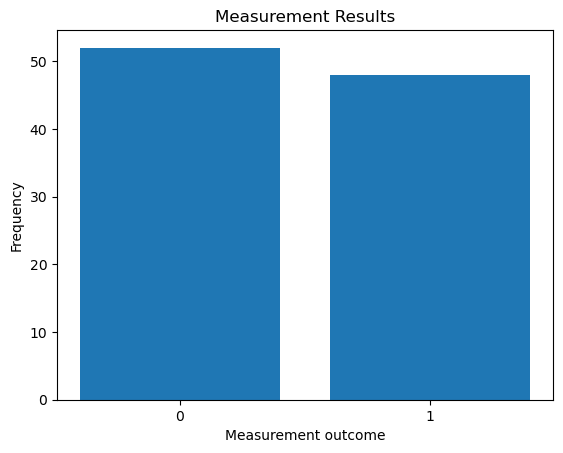

In [246]:
# viusalize the measurement outcomes after applying the Hadamard on the state

import matplotlib.pyplot as plt
from collections import Counter

results = quantum_algorithm('U')
counts = Counter(results)
plt.bar(counts.keys(), counts.values())
plt.xticks([0, 1])
plt.xlabel('Measurement outcome')
plt.ylabel('Frequency')
plt.title('Measurement Results')
plt.show()

In [240]:
quantum_algorithm('X')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Remind that $X$ is a bit-flip gate: $X \ket{0} = \ket{1}$. Thus, all the outcomes are $1$.

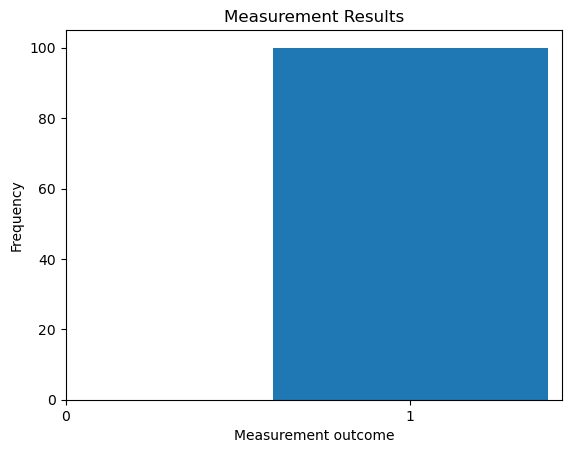

In [248]:
# viusalize the measurement outcomes after applying the X-gate on the state

import matplotlib.pyplot as plt
from collections import Counter

results = quantum_algorithm('X')
counts = Counter(results)
plt.bar(counts.keys(), counts.values())
plt.xticks([0, 1])
plt.xlabel('Measurement outcome')
plt.ylabel('Frequency')
plt.title('Measurement Results')
plt.show()

In [242]:
quantum_algorithm('Y')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

All of the outcomes are $1$ because $Y$ is a bit- and phase-flip gate: $Y \ket{0} = i \ket{1}$. Since the imaginary part $i$ has no observable effect, we ignore it. 

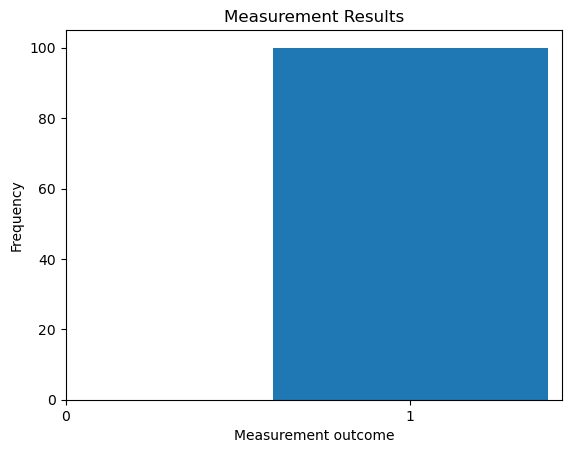

In [250]:
# viusalize the measurement outcomes after applying the Y-gate on the state

import matplotlib.pyplot as plt
from collections import Counter

results = quantum_algorithm('Y')
counts = Counter(results)
plt.bar(counts.keys(), counts.values())
plt.xticks([0, 1])
plt.xlabel('Measurement outcome')
plt.ylabel('Frequency')
plt.title('Measurement Results')
plt.show()

In [244]:
quantum_algorithm('Z')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Clearly, Z is phase-flip gate and does not change the bits: $Z\ket{0} = \ket{0}$. Therefore, we obtain $0$ with the 100% probability.  

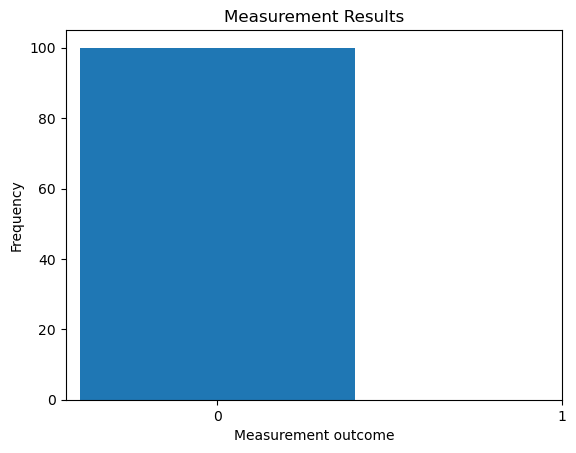

In [252]:
# viusalize the measurement outcomes after applying the Z-gate on the state

import matplotlib.pyplot as plt
from collections import Counter

results = quantum_algorithm('Z')
counts = Counter(results)
plt.bar(counts.keys(), counts.values())
plt.xticks([0, 1])
plt.xlabel('Measurement outcome')
plt.ylabel('Frequency')
plt.title('Measurement Results')
plt.show()

## Conclusion and Next Steps

In this notebook, we introduced the fundamental concepts of quantum computing:

- The mathematical structure of qubits and their representation.
- Key quantum operations such as measurement and unitary transformations.
- The role of quantum gates like the Pauli matrices and their impact on quantum states.

In the next notes, we will explore quantum circuits. 

## References

Nadkarni, P. J., Rengaswamy, N., & Vasić, B. (2024). Tutorial on quantum error correction for 2024 quantum information knowledge (quik) workshop. arXiv preprint arXiv:2407.12737.

De Wolf, R. (2019). Quantum computing: Lecture notes. arXiv preprint arXiv:1907.09415.

Walter, M., & Ozols, M. (2022). Lectures Notes on Quantum Information Theory. University of Amsterdam, Tech. Rep.

Aaronson, S. (2022, May). Introduction to quantum information science II lecture notes.

Christandl, M. (2012, January). Quantum information theory.

Roffe, J. (2019). Quantum error correction: an introductory guide. Contemporary Physics, 60(3), 226-245.